## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as st
%matplotlib inline 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
data.head()
data.shape

(1893, 8)

In [2]:
# Checking the number of mice.
data['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# reset the index to "Mouse ID"
index_data  = data.set_index('Mouse ID')
# 'g989' has duplicated time point
index_data.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = index_data.drop(['g989'])

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data.shape
# data shape (1893, 8), clean_data shape (1880, 7) 13 rows of g989 has been removed. 7 columns because we set Mouse ID as the index of the data frame
clean_data = clean_data.reset_index()
clean_data['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# group the clean data by Drug Regimen
tumor = clean_data.groupby('Drug Regimen')

#calculate mean, median, standard deviation, and sem for each drug
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_median = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()

# create a dataframe
tumor_summary = pd.DataFrame({'Mean' : tumor_mean,
                              'Median' : tumor_median,
                              'Variance' : tumor_var,
                              'Standard Deviation' : tumor_std,
                              'SEM' : tumor_sem})

tumor_summary.head()



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_summary = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Point')

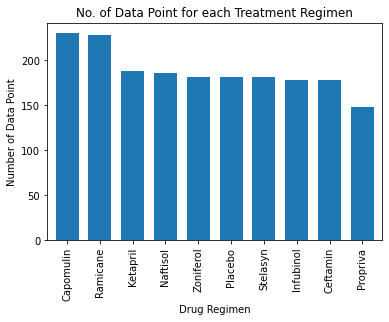

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
pandas_plot = clean_data['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)
pandas_plot.set_title('No. of Data Point for each Treatment Regimen')
pandas_plot.set_xlabel('Drug Regimen')
pandas_plot.set_ylabel('Number of Data Point')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

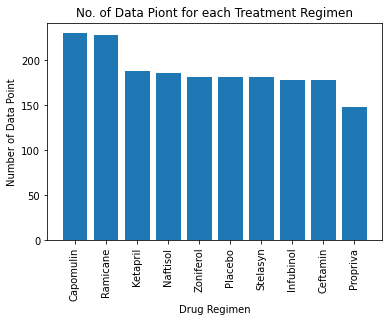

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
count = clean_data['Drug Regimen'].value_counts()
plt.bar(count.index, count.values)
plt.title('No. of Data Piont for each Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Point')
plt.xticks(rotation='vertical')

<AxesSubplot:title={'center':'Distribution of Mice by sex'}, ylabel='Sex'>

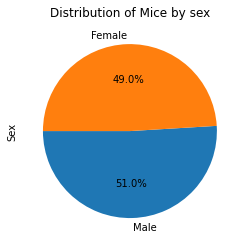

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex = clean_data['Sex'].value_counts()
sex.plot.pie(startangle=180,autopct='%1.1f%%', title='Distribution of Mice by sex')


Text(0.5, 1.0, 'Distribution of Mice by sex')

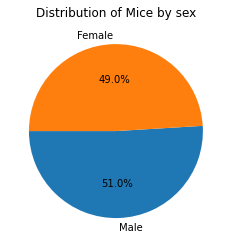

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex, labels=sex.index.values, startangle=180,autopct='%1.1f%%')
plt.title('Distribution of Mice by sex')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tumor = clean_data.groupby(['Mouse ID'])['Timepoint'].max().sort_values().reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
last_tumor_df = pd.DataFrame(last_tumor)
last_tumor_df.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = pd.merge(clean_data, last_tumor_df, on=('Mouse ID'))
merge_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_regimen = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment:
    temp = merge_data.loc[merge_data['Drug Regimen'] == drug]
    
    # add subset 
    # create a subset df that has rows only contain the final timepoint for each treament
    final_volume = temp.loc[temp['Timepoint'] == temp['Max Timepoint']]
    # Create a series that containall the final volume value for each treament
    values = final_volume['Tumor Volume (mm3)']
    drug_regimen.append(values)

    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {round(iqr, 4)}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {round(lower_bound, 4)}')
    print(f'Upper Bound for {drug}: {round(upper_bound, 4)}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume['Tumor Volume (mm3)'] >= upper_bound) | 
                                 (final_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}\n')
     
    
    # Determine outliers using upper and lower bounds

IQR for Capomulin: 7.7819
Lower Bound for Capomulin: 20.7046
Upper Bound for Capomulin: 51.832
Number of Capomulin outliers: 0

IQR for Ramicane: 9.0985
Lower Bound for Ramicane: 17.9127
Upper Bound for Ramicane: 54.3068
Number of Ramicane outliers: 0

IQR for Infubinol: 11.4771
Lower Bound for Infubinol: 36.8329
Upper Bound for Infubinol: 82.7414
Number of Infubinol outliers: 1

IQR for Ceftamin: 15.5778
Lower Bound for Ceftamin: 25.3554
Upper Bound for Ceftamin: 87.6665
Number of Ceftamin outliers: 0



Text(0, 0.5, 'Final Tumor Volume (mm3)')

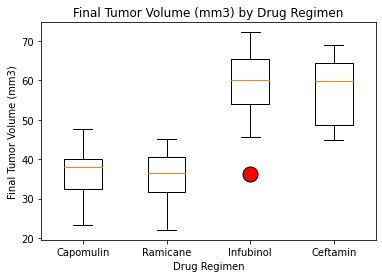

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier = {'marker' : 'o', 'markerfacecolor' : 'r', 'markersize' : 15}
plt.boxplot(drug_regimen, flierprops=outlier)
plt.title('Final Tumor Volume (mm3) by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.xticks([1,2,3,4], treatment)
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
clean_data[clean_data['Drug Regimen'] == 'Capomulin']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1439,r157,Capomulin,Male,22,25,0,45.000000,0
1440,r157,Capomulin,Male,22,25,5,45.597064,0
1441,r157,Capomulin,Male,22,25,10,46.059608,0


Mouse ID              10
Drug Regimen          10
Sex                   10
Age_months            10
Weight (g)            10
Timepoint             10
Tumor Volume (mm3)    10
Metastatic Sites      10
dtype: int64


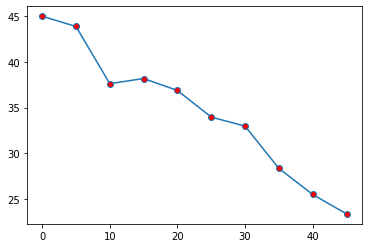

In [17]:
mouse = clean_data.loc[clean_data['Mouse ID']=='s185']
print(mouse.count())
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o', markerfacecolor='red')

Text(0, 0.5, 'Avg.Tumor Volume (mm3)')

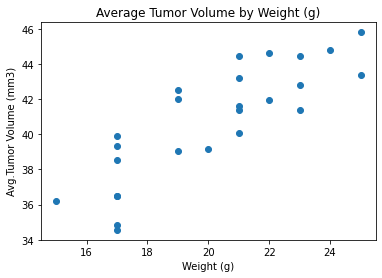

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

#find the aveerage tumor volume for each mouse\
cap_avg = cap_df.groupby('Mouse ID').mean()
plt.scatter(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume by Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Avg.Tumor Volume (mm3)')

## Correlation and Regression

The correlation between the weight and the average tumor volume of Capomulin regimen is 0.84


Text(20, 37, 'y = 0.95x + 21.55')

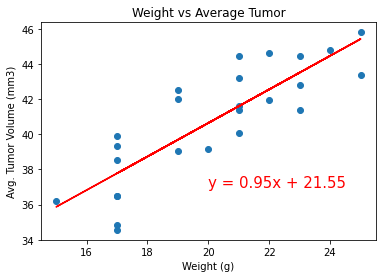

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])[0], 2)
print(f'The correlation between the weight and the average tumor volume of Capomulin regimen is {corr}')

#claculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])

line = slope * cap_avg['Weight (g)'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'], line, color='red')
plt.title('Weight vs Average Tumor')
plt.xlabel('Weight (g)')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.annotate(line_eq,(20,37),fontsize=15,color="red")


. From the scatter plot, there is a strong positive linear corerelation between the weight of the mouse and the size of the tumor (r-value = 0.95). The heavier the mouse, the less effective the drug on it. 

. From the analysis, Capomulin and Ramanicane are the most effective drug for decreasing tumor size (as shown in the boxplots of 4 drug regimen). The other drug, Infubinol and Ceftamin are seem to be less effective

. The study provide a consistent and reliable data since there is only 1 outlier for Infubinol and none for the other drug. Since Infubinol and Ceftamin are the less effective drug on tumor treatment, hence we can drop these treatment and focus on advancing the most effective treatment ( Capomulin and Ramanicane) in the next stage of study